In [1]:
import torch.nn as nn
import torch
import torch.nn.functional as F
from tqdm import tqdm

class MaqamCNN1(nn.Module):
    def __init__(self):
        super(MaqamCNN1, self).__init__()
        
        self.conv1 = nn.Conv2d(in_channels=30, out_channels=36, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(36)
        self.pool1 = nn.MaxPool2d(kernel_size=1, stride=2)
        self.dropout1 = nn.Dropout(p=0.2)
        
        self.conv2 = nn.Conv2d(in_channels=36, out_channels=20, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(20)
        self.pool2 = nn.MaxPool2d(kernel_size=1, stride=2)
        self.dropout2 = nn.Dropout(p=0.1)

        self.fc1 = nn.Linear(8460, 256)
        self.dropout3 = nn.Dropout(p=0.1)

        self.fc2 = nn.Linear(512, 265)
        self.dropout4 = nn.Dropout(p=0.1)

        self.fc3 = nn.Linear(256, 128)
        self.dropout5 = nn.Dropout(p=0.1)

        self.fc4 = nn.Linear(128, 8)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = x.unsqueeze(-1)
        x = F.relu(self.conv1(x))
        x = self.bn1(x)
        x = self.pool1(x)
        x = self.dropout1(x)
        
        # x = F.relu(self.conv2(x))
        # x = self.bn2(x)
        # x = self.pool2(x)
        # x = self.dropout2(x)
        
        x = x.view(x.size(0), -1)
        
        x = F.relu(self.fc1(x))
        x = self.dropout3(x)
        
        # x = F.relu(self.fc2(x))
        # x = self.dropout4(x)

        x = self.fc3(x)
        x = self.dropout5(x)

        x = self.fc4(x)
        x = F.softmax(x, dim=1)
        return x


/home/faisal/anaconda3/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
class CNN_LSTM(nn.Module):
    def __init__(self):
        super(CNN_LSTM, self).__init__()
        
        self.conv1 = nn.Conv2d(in_channels=30, out_channels=64, kernel_size=(3,3), padding="same")
        self.bn1 = nn.BatchNorm2d(64)
        self.pool1 = nn.MaxPool2d(kernel_size=(1,1))
        self.dropout1 = nn.Dropout(p=0.1)
        
        self.conv2 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=(1,1), padding="valid")
        self.bn2 = nn.BatchNorm2d(64)
        self.pool2 = nn.MaxPool2d(kernel_size=(1,1))
        self.dropout2 = nn.Dropout(p=0.2)

        self.lstm = nn.LSTM(input_size=64, hidden_size=128, num_layers=2, batch_first=True)
        self.dropout6 = nn.Dropout(p=0.25)

        self.fc1 = nn.Linear(128, 64)
        self.dropout3 = nn.Dropout(p=0.2)

        self.fc2 = nn.Linear(64, 32)
        self.dropout4 = nn.Dropout(p=0.2)

        self.fc3 = nn.Linear(32, 8)
        self.dropout5 = nn.Dropout(p=0.2)

    def forward(self, x):
        x = x.unsqueeze(-1)
        x = F.relu(self.conv1(x))
        x = self.bn1(x)
        x = self.pool1(x)
        x = self.dropout1(x)
        
        x = F.relu(self.conv2(x))
        x = self.bn2(x)
        x = self.pool2(x)
        x = self.dropout2(x)

        # Reshape the CNN output to match LSTM input
        batch_size, channels, height, width = x.size()
        x = x.view(batch_size, channels, height * width)
        x = x.permute(0, 2, 1)  # Permute to (batch_size, sequence_length, input_size)

        x, _ = self.lstm(x)

        x = self.fc1(x[:, -1, :])
        
        x = F.relu(self.fc2(x))
        x = self.dropout3(x)
        
        x = F.relu(self.fc3(x))
        # x = self.dropout4(x)

        # x = self.fc3(x)
        # x = self.dropout5(x)
        x = F.softmax(x, dim=1)
        return x


In [3]:
import torch.nn as nn
import torch.nn.functional as F

class MFCC_LSTM(nn.Module):
    def __init__(self):
        super(MFCC_LSTM, self).__init__()
        
        self.lstm1 = nn.LSTM(input_size=20, hidden_size=1024, num_layers=1, batch_first=True)
        self.dropout1 = nn.Dropout(p=0.3)
        self.lstm2 = nn.LSTM(input_size=1024, hidden_size=512, num_layers=1, batch_first=True)
        self.dropout2 = nn.Dropout(p=0.3)
        self.lstm3 = nn.LSTM(input_size=512, hidden_size=256, num_layers=1, batch_first=True)
        self.dropout3 = nn.Dropout(p=0.2)
        
        self.fc1 = nn.Linear(256, 512)
        self.dropout4 = nn.Dropout(p=0.2)

        self.fc2 = nn.Linear(512, 256)
        self.dropout5 = nn.Dropout(p=0.2)

        self.fc3 = nn.Linear(256, 64)
        self.dropout6 = nn.Dropout(p=0.2)

        self.fc4 = nn.Linear(64, 8)

    def forward(self, x):
        x = torch.transpose(x, 1, 2)
        
        x, _ = self.lstm1(x)
        x = self.dropout1(x)

        x, _ = self.lstm2(x)
        x = self.dropout2(x)

        x, _ = self.lstm3(x)
        x = self.dropout3(x)

        x = x[:,-1,:]
        
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout4(x)

        x = self.fc2(x)
        x = F.relu(x)
        x = self.dropout5(x)

        x = self.fc3(x)
        x = F.relu(x)
        x = self.dropout6(x)

        
        x = self.fc4(x)
        x = F.softmax(x, dim=1)
        return x


In [4]:
import torch.nn as nn
import torch.nn.functional as F

class MFCC_LSTM2(nn.Module):
    def __init__(self):
        super(MFCC_LSTM2, self).__init__()
        
        self.lstm1 = nn.LSTM(input_size=20, hidden_size=1024, num_layers=1, batch_first=True)
        self.dropout1 = nn.Dropout(p=0.2)

        self.fc3 = nn.Linear(1024, 256)
        self.dropout6 = nn.Dropout(p=0.2)

        self.fc4 = nn.Linear(256, 8)

    def forward(self, x):
        x = torch.transpose(x, 1, 2)
        # Apply the first LSTM layer
        x, _ = self.lstm1(x)
        x = self.dropout1(x)
        
        x = self.fc3(x)
        x = F.relu(x)
        x = self.dropout6(x)

        # Take the last hidden state of the last LSTM layer
        x = x[:, -1, :]
        
        x = self.fc4(x)
        x = F.softmax(x, dim=1)
        
        return x


In [5]:
class ANNModel(nn.Module):
    def __init__(self):
        super(ANNModel, self).__init__()

        self.fc1 = nn.Linear(12920, 1024)
        self.bn1 = nn.BatchNorm1d(1024)
        self.dropout1 = nn.Dropout(p=0.2)
        
        self.fc2 = nn.Linear(1024, 64)
        self.bn2 = nn.BatchNorm1d(64)
        self.dropout2 = nn.Dropout(p=0.2)
        
        self.fc3 = nn.Linear(256, 64)
        self.bn3 = nn.BatchNorm1d(64)
        self.dropout3 = nn.Dropout(p=0.1)
        
        self.fc4 = nn.Linear(1024, 256)
        self.bn4 = nn.BatchNorm1d(256)
        self.dropout4 = nn.Dropout(p=0.2)
        
        self.fc5 = nn.Linear(256, 64)
        self.bn5 = nn.BatchNorm1d(64)
        self.dropout5 = nn.Dropout(p=0.1)
        
        self.fc6 = nn.Linear(512, 256)
        self.bn6 = nn.BatchNorm1d(256)
        self.dropout6 = nn.Dropout(p=0.0)
        
        self.fc7 = nn.Linear(256, 32)
        self.bn7 = nn.BatchNorm1d(32)
        self.dropout7 = nn.Dropout(p=0.0)

        self.output_layer = nn.Linear(64, 8)

    def forward(self, x):
        # Flatten the input data to [batch_size, 30 * 469]
        x = x.view(x.size(0), -1)
        
        x = self.fc1(x)
        x = self.bn1(x)
        x = F.relu(x)
        x = self.dropout1(x)

        x = self.fc2(x)
        x = self.bn2(x)
        x = F.relu(x)
        x = self.dropout2(x)

        # x = self.fc3(x)
        # x = self.bn3(x)
        # x = F.relu(x)
        # x = self.dropout3(x)

        # x = self.fc4(x)
        # x = self.bn4(x)
        # x = F.relu(x)
        # x = self.dropout4(x)

        # x = self.fc5(x)
        # x = self.bn5(x)
        # x = F.relu(x)
        # x = self.dropout5(x)

        # x = self.fc6(x)
        # x = self.bn6(x)
        # x = F.relu(x)
        # x = self.dropout6(x)

        # x = self.fc7(x)
        # x = self.bn7(x)
        # x = F.relu(x)
        # x = self.dropout7(x)

        x = self.output_layer(x)
        x = F.softmax(x, dim=1)
        return x

In [6]:
class ANNModel2(nn.Module):
    def __init__(self):
        super(ANNModel2, self).__init__()

        self.fc1 = nn.Linear(20, 1024)
        self.bn1 = nn.BatchNorm1d(1024)
        self.dropout1 = nn.Dropout(p=0.2)
        
        self.fc2 = nn.Linear(1024, 512)
        self.bn2 = nn.BatchNorm1d(512)
        self.dropout2 = nn.Dropout(p=0.2)
        
        self.fc3 = nn.Linear(512, 256)
        self.bn3 = nn.BatchNorm1d(256)
        self.dropout3 = nn.Dropout(p=0.1)
        
        self.fc4 = nn.Linear(256, 128)
        self.bn4 = nn.BatchNorm1d(128)
        self.dropout4 = nn.Dropout(p=0)
        
        self.fc5 = nn.Linear(128, 64)
        self.bn5 = nn.BatchNorm1d(64)
        self.dropout5 = nn.Dropout(p=0)

        self.output_layer = nn.Linear(64, 8)

    def forward(self, x):
        # Flatten the input data to [batch_size, 30 * 469]
        # x = x.view(x.size(0), -1)
        x = x.float()
        x = self.fc1(x)
        x = self.bn1(x)
        x = F.relu(x)
        x = self.dropout1(x)

        x = self.fc2(x)
        x = self.bn2(x)
        x = F.relu(x)
        x = self.dropout2(x)

        x = self.fc3(x)
        x = self.bn3(x)
        x = F.relu(x)
        x = self.dropout3(x)

        x = self.fc4(x)
        x = self.bn4(x)
        x = F.relu(x)
        x = self.dropout4(x)

        x = self.fc5(x)
        x = self.bn5(x)
        x = F.relu(x)
        x = self.dropout5(x)

        x = self.output_layer(x)
        x = F.softmax(x, dim=1)
        return x

In [7]:
import os
import torchaudio
import torch
from torch.utils.data import Dataset
import torch.nn as nn
import torch.nn.functional as F
import librosa
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
from tensorboardX import SummaryWriter
from features_extractor import*

class MaqamDataset(Dataset):
    def __init__(self, mode='train', transform=None, cache_file='1.pkl'):
        self.data_dir = "/home/faisal/Desktop/datafullll"
        # "/home/faisal/Desktop/datafullll"
        # "/home/faisal/Desktop/datasetfull"
        # "/home/faisal/Desktop/MAQAMAT/mp3_maqamat/Readers/Saed_ghamdi"
        # "/home/faisal/Desktop/MAQAMAT/Maqam478/Dataset2"
        # "/home/faisal/Desktop/MAQAMAT/Fullynewdataset"
        # "/home/faisal/Desktop/MAQAMAT/fullqualitydataset"
        self.mode = mode
        self.transform = transform
        test_val_size = 0.3
        #['Ajam', 'Bayat', 'Hijaz', 'Kurd', 'Nahawand', 'Rast', 'Saba', 'Seka']
        self.maqams = ['Ajam', 'Bayat', 'Hijaz', 'Kurd', 'Nahawand', 'Rast', 'Saba', 'Seka']
        self.audio_list = self._load_audio_list()
        if mode == 'train':
            train_list, val_list = train_test_split(self.audio_list, test_size=test_val_size, random_state=42, stratify=[label for (_, label) in self.audio_list])
            self.audio_list = train_list
            self.features = compute_features(self.audio_list, cache_file="train_features.pkl")
        elif mode == 'val':
            train_list, set2 = train_test_split(self.audio_list, test_size=test_val_size, random_state=42, stratify=[label for (_, label) in self.audio_list])
            val_set, test_set = train_test_split(set2, test_size=0.5, random_state=42, stratify=[label for (_, label) in set2])
            self.audio_list = val_set
            self.features = compute_features(self.audio_list, cache_file="val_features.pkl")
        elif mode == 'test':
            train_list, set2 = train_test_split(self.audio_list, test_size=test_val_size, random_state=42, stratify=[label for (_, label) in self.audio_list])
            val_set, test_set = train_test_split(set2, test_size=0.5, random_state=42, stratify=[label for (_, label) in set2])
            self.audio_list = test_set
            self.features = compute_features(self.audio_list, cache_file="test_features.pkl")
        
        self.cache_file = cache_file
        self.data = self._load_data_from_cache_or_compute()

    def _load_audio_list(self):
        audio_list = []
        for i, maqam in enumerate(self.maqams):
            label_dir = os.path.join(self.data_dir, maqam)
            audio_list += [(os.path.join(label_dir, audio_name), i) for audio_name in os.listdir(label_dir) if audio_name.endswith('.wav')]
        return audio_list

    def __len__(self):
        return len(self.audio_list)

    def __getitem__(self, idx):
        audio_path, label_idx = self.audio_list[idx]
        waveform, sample_rate = torchaudio.load(audio_path)
        waveform = waveform[0] # only keep the first channel
        if self.transform:
            waveform = self.transform(waveform)
        
        # mfcc = self.compute_mfcc(waveform).T
        # mfcc = torch.from_numpy(mfcc).float()
        # features = get_all_features(audio_path)
        # features = torch.from_numpy(features).float()
        features = self.features[idx]
        return features, label_idx
  
    def pad_to_max_length(self, max_length):
        for i in range(len(self)):
            padded_data = F.pad(self.data[i][0], (0, max_length - len(self.data[i][0])), 'constant', 0)
            self.data[i] = (padded_data, self.data[i][1])

    def compute_mfcc(self, waveform):
        # Compute the MFCC of the waveform
        n_fft = 1024*16
        hop_length = 256*8
        n_mels = 100
        sr = 48000
        n_mfcc = 20
        waveform = waveform.numpy()  # Convert PyTorch tensor to NumPy array
        mfcc = librosa.feature.mfcc(y=waveform, sr=sr)
        mfcc = np.transpose(mfcc)
        mfcc = mfcc.astype(np.float32)  # Ensure data type is compatible with np.issubdtype()
        return mfcc
    
    def _load_data_from_cache_or_compute(self):
        if os.path.isfile(self.cache_file):
            print(f'Loading data from cache file: {self.cache_file}')
            with open(self.cache_file, 'rb') as f:
                return pickle.load(f)
        else:
            print(f'Cache file not found. Computing data from scratch and saving to cache file: {self.cache_file}')
            data = [self.__getitem__(i) for i in range(len(self))]
            with open(self.cache_file, 'wb') as f:
                pickle.dump(data, f)
            return data


In [8]:
import torch
from torch.utils.data import DataLoader
import librosa
import matplotlib.pyplot as plt
import torch.nn.functional as F
from torch.nn.utils.rnn import pad_sequence

max_length = 1440000

def MFCC_plot(mfcc):
        plt.figure(figsize=(10, 4))
        mfcc = mfcc.detach().numpy()
        mfcc = mfcc.mean(axis=2).T
        librosa.display.specshow(mfcc, x_axis='time')
        plt.colorbar()
        plt.title('MFCC')
        plt.tight_layout()
        plt.show()

def custom_collate(batch):
    inputs, labels = zip(*batch)
    max_frames = max([m.shape[1] for m in inputs])
    padded_mfcc = []
    for m in inputs:
        pad_width = ((0, 0), (0, max_frames - m.shape[1]))
        padded_m = np.pad(m, pad_width=pad_width, mode='constant')
        padded_mfcc.append(padded_m)

    padded_mfcc = torch.from_numpy(np.array(padded_mfcc)).float()
    labels = torch.tensor(labels)
    return padded_mfcc, labels



In [9]:
# Define training and validation datasets with specified test size


# Define training and validation data loaders
batch_size = 64

In [10]:
# torch.cuda.init()
# torch.cuda.empty_cache()
option = 3 #1-CNN 2-LSTM 3-ANN

In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from tqdm import tqdm
if(option == 1):
    train_dataset = MaqamDataset(mode='train', cache_file = '2.pkl')
    val_dataset = MaqamDataset(mode='val', cache_file = 'validation.pkl')
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, collate_fn=custom_collate)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=True, collate_fn=custom_collate)
    l = 0.001
    # Lists to store accuracy and loss values
    train_losses = []
    train_accuracies = []
    val_losses = []
    val_accuracies = []
    print("_________________________________________________________")
    print("Learning rate = ", l)
    # Rest of the model definition and data loaders

    # Initialize model and define loss function and optimizer
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

    model = MaqamCNN1().to(device)
    criterion = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=l)

    # Train the model for a specified number of epochs
    num_epochs = 40
    patience = 40  # Number of epochs to wait for improvement before early stopping
    best_val_loss = float('inf')
    best_model_state_dict = None
    no_improvement_epochs = 0

    print("Starting training")
    for epoch in range(num_epochs):
        # Set the model to training mode for the current epoch
        model.train()

        # Training loop
        running_loss = 0.0
        correct_predictions = 0
        total_samples = 0

        for i, data in enumerate(tqdm(train_loader, desc=f'Epoch {epoch + 1}/{num_epochs}', leave=False)):
            inputs, targets = data  # MFCCs and labels
            targets = targets.to(device)
            inputs = inputs.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()

            # Update the loss and accuracy metrics
            running_loss += loss.item()
            _, predicted_labels = torch.max(outputs, 1)
            correct_predictions += (predicted_labels == targets).sum().item()
            total_samples += len(targets)

        # Calculate and print average loss and accuracy for the current epoch
        avg_loss = running_loss / len(train_loader)
        avg_accuracy = 100 * correct_predictions / total_samples
        print(f'Epoch {epoch + 1}/{num_epochs}: Train Loss={avg_loss:.5f}, Train Accuracy={avg_accuracy:.5f}%')

        # Validation loop
        model.eval()
        val_loss = 0.0
        total_correct = 0
        total_samples = 0

        with torch.no_grad():
            for data in tqdm(val_loader, desc='Validation', leave=False):
                inputs, targets = data  # MFCCs and labels
                targets = targets.to(device)
                inputs = inputs.to(device)
                outputs = model(inputs)
                val_loss += criterion(outputs, targets).item() * len(targets)

                _, predicted_labels = torch.max(outputs, 1)
                total_correct += (predicted_labels == targets).sum().item()
                total_samples += len(targets)

        val_loss /= len(val_dataset)
        val_acc = 100 * total_correct / total_samples

        train_losses.append(avg_loss)
        train_accuracies.append(avg_accuracy)
        val_losses.append(val_loss)
        val_accuracies.append(val_acc)

        print(f'Epoch {epoch + 1}/{num_epochs} validation: val_loss={val_loss:.5f}, val_acc={val_acc:.5f}%')

        # Check for early stopping
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_model_state_dict = model.state_dict()
            no_improvement_epochs = 0
        else:
            no_improvement_epochs += 1

        if no_improvement_epochs >= patience:
            print("Early stopping. No improvement in validation loss for {} epochs.".format(patience))
            break

    # Load the best model state dict
    if best_model_state_dict is not None:
        model.load_state_dict(best_model_state_dict)

    # Test the model on the test dataset
    test_dataset = MaqamDataset(mode='test', cache_file='test.pkl')
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, collate_fn=custom_collate)

    model.eval()
    total_correct = 0
    total_samples = 0

    with torch.no_grad():
        for data in tqdm(test_loader, desc='Testing', leave=False):
            inputs, targets = data
            targets = targets.to(device)
            inputs = inputs.to(device)
            outputs = model(inputs)

            _, predicted_labels = torch.max(outputs, 1)
            total_correct += (predicted_labels == targets).sum().item()
            total_samples += len(targets)

    test_acc = 100 * total_correct / total_samples
    print(f'Test Accuracy: {test_acc:.5f}%')

    # Save the trained model
    torch.save(model.state_dict(), 'CNN1.pth')
    plt.figure()
    plt.plot(range(1, len(train_losses) + 1), train_losses, label='Train Loss')
    plt.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title(f'Learning Rate: {l}')
    plt.savefig(f'CNN loss_plot.png')
    plt.close()

    plt.figure()
    plt.plot(range(1, len(train_accuracies) + 1), train_accuracies, label='Train Accuracy')
    plt.plot(range(1, len(val_accuracies) + 1), val_accuracies, label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title(f'Learning Rate: {l}')
    plt.savefig(f'CNN accuracy_plot.png')
    plt.close()

In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from tqdm import tqdm
if(option == 2):
    l = 0.001
    # Lists to store accuracy and loss values
    train_losses = []
    train_accuracies = []
    val_losses = []
    val_accuracies = []
    train_dataset = MaqamDataset(mode='train', cache_file = 'train.pkl')
    val_dataset = MaqamDataset(mode='val', cache_file = 'val.pkl')
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, collate_fn=custom_collate)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, collate_fn=custom_collate)
    print("_________________________________________________________")
    print("Learning rate = ", l)
    # Rest of the model definition and data loaders

    # Initialize model and define loss function and optimizer
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

    model = MFCC_LSTM().to(device)
    criterion = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=l)

    # Train the model for a specified number of epochs
    num_epochs = 40
    patience = 5  # Number of epochs to wait for improvement before early stopping
    best_val_loss = float('inf')
    best_model_state_dict = None
    no_improvement_epochs = 0

    print("Starting training")
    for epoch in range(num_epochs):
        # Set the model to training mode for the current epoch
        model.train()

        # Training loop
        running_loss = 0.0
        correct_predictions = 0
        total_samples = 0

        for i, data in enumerate(tqdm(train_loader, desc=f'Epoch {epoch + 1}/{num_epochs}', leave=False)):
            inputs, targets = data  # MFCCs and labels
            targets = targets.to(device)
            inputs = inputs.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()

            # Update the loss and accuracy metrics
            running_loss += loss.item()
            _, predicted_labels = torch.max(outputs, 1)
            correct_predictions += (predicted_labels == targets).sum().item()
            total_samples += len(targets)

        # Calculate and print average loss and accuracy for the current epoch
        avg_loss = running_loss / len(train_loader)
        avg_accuracy = 100 * correct_predictions / total_samples
        print(f'Epoch {epoch + 1}/{num_epochs}: Train Loss={avg_loss:.5f}, Train Accuracy={avg_accuracy:.5f}%')

        # Validation loop
        model.eval()
        val_loss = 0.0
        total_correct = 0
        total_samples = 0

        with torch.no_grad():
            for data in tqdm(val_loader, desc='Validation', leave=False):
                inputs, targets = data  # MFCCs and labels
                targets = targets.to(device)
                inputs = inputs.to(device)
                outputs = model(inputs)
                val_loss += criterion(outputs, targets).item() * len(targets)

                _, predicted_labels = torch.max(outputs, 1)
                total_correct += (predicted_labels == targets).sum().item()
                total_samples += len(targets)

        val_loss /= len(val_dataset)
        val_acc = 100 * total_correct / total_samples

        train_losses.append(avg_loss)
        train_accuracies.append(avg_accuracy)
        val_losses.append(val_loss)
        val_accuracies.append(val_acc)

        print(f'Epoch {epoch + 1}/{num_epochs} validation: val_loss={val_loss:.5f}, val_acc={val_acc:.5f}%')

        # Check for early stopping
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_model_state_dict = model.state_dict()
            no_improvement_epochs = 0
        else:
            no_improvement_epochs += 1

        if no_improvement_epochs >= patience:
            print("Early stopping. No improvement in validation loss for {} epochs.".format(patience))
            break

    # Load the best model state dict
    if best_model_state_dict is not None:
        model.load_state_dict(best_model_state_dict)

    # Test the model on the test dataset
    test_dataset = MaqamDataset(mode='test', cache_file='1.pkl')
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, collate_fn=custom_collate)

    model.eval()
    total_correct = 0
    total_samples = 0

    with torch.no_grad():
        for data in tqdm(test_loader, desc='Testing', leave=False):
            inputs, targets = data
            targets = targets.to(device)
            inputs = inputs.to(device)
            outputs = model(inputs)

            _, predicted_labels = torch.max(outputs, 1)
            total_correct += (predicted_labels == targets).sum().item()
            total_samples += len(targets)

    test_acc = 100 * total_correct / total_samples
    print(f'Test Accuracy: {test_acc:.5f}%')

    # Save the trained model
    torch.save(model.state_dict(), 'lstm.pth')
    plt.figure()
    plt.plot(range(1, len(train_losses) + 1), train_losses, label='Train Loss')
    plt.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title(f'Learning Rate: {l}')
    plt.savefig(f'LSTM loss_plot_lr_{l}.png')
    plt.close()

    plt.figure()
    plt.plot(range(1, len(train_accuracies) + 1), train_accuracies, label='Train Accuracy')
    plt.plot(range(1, len(val_accuracies) + 1), val_accuracies, label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title(f'Learning Rate: {l}')
    plt.savefig(f'LSTM accuracy_plot_lr_{l}.png')
    plt.close()


In [13]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from tqdm import tqdm

writer = SummaryWriter('logs/')
if(option == 3):
    l = 0.0001
    # Lists to store accuracy and loss values
    train_losses = []
    train_accuracies = []
    val_losses = []
    val_accuracies = []

    train_dataset = MaqamDataset(mode='train', cache_file = 'train.pkl')
    val_dataset = MaqamDataset(mode='val', cache_file = 'val.pkl')
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=True)
    print("_________________________________________________________")
    print("Learning rate = ", l)
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    model = ANNModel2().to(device)
    criterion = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=l)

    num_epochs = 150
    patience = num_epochs
    best_val_loss = float('inf')
    best_model_state_dict = None
    no_improvement_epochs = 0

    print("Starting training")
    for epoch in range(num_epochs):
        model.train()
        # new_lr = (num_epochs-epoch)/(num_epochs*10000)
        # for param_group in optimizer.param_groups:
        #     param_group['lr'] = new_lr
        running_loss = 0.0
        correct_predictions = 0
        total_samples = 0
        writer.add_scalar('Learning Rate', optimizer.param_groups[0]['lr'], epoch)
        for i, data in enumerate(tqdm(train_loader, desc=f'Epoch {epoch + 1}/{num_epochs}', leave=False)):
            inputs, targets = data  # MFCCs and labels
            targets = targets.to(device)
            inputs = inputs.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted_labels = torch.max(outputs, 1)
            correct_predictions += (predicted_labels == targets).sum().item()
            total_samples += len(targets)

        avg_loss = running_loss / len(train_loader)
        avg_accuracy = 100 * correct_predictions / total_samples
        train_losses.append(avg_loss)
        train_accuracies.append(avg_accuracy)

        # Log training loss and accuracy
        writer.add_scalar('Train Loss', avg_loss, epoch)
        writer.add_scalar('Train Accuracy', avg_accuracy, epoch)

        print(f'Epoch {epoch + 1}/{num_epochs}: Train Loss={avg_loss:.5f}, Train Accuracy={avg_accuracy:.5f}%')

        model.eval()
        val_loss = 0.0
        total_correct = 0
        total_samples = 0

        with torch.no_grad():
            for data in tqdm(val_loader, desc='Validation', leave=False):
                inputs, targets = data  # MFCCs and labels
                targets = targets.to(device)
                inputs = inputs.to(device)
                outputs = model(inputs)
                val_loss += criterion(outputs, targets).item() * len(targets)

                _, predicted_labels = torch.max(outputs, 1)
                total_correct += (predicted_labels == targets).sum().item()
                total_samples += len(targets)

        val_loss /= len(val_dataset)
        val_acc = 100 * total_correct / total_samples
        val_losses.append(val_loss)
        val_accuracies.append(val_acc)
        print(f'Epoch {epoch + 1}/{num_epochs} validation: val_loss={val_loss:.5f}, val_acc={val_acc:.5f}%')
        # Log validation loss and accuracy
        writer.add_scalar('Validation Loss', val_loss, epoch)
        writer.add_scalar('Validation Accuracy', val_acc, epoch)
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_model_state_dict = model.state_dict()
            no_improvement_epochs = 0
        else:
            no_improvement_epochs += 1

        if no_improvement_epochs >= patience:
            print("Early stopping. No improvement in validation loss for {} epochs.".format(patience))
            break

        for name, param in model.named_parameters():
            writer.add_histogram(name, param, epoch)
            
    if best_model_state_dict is not None:
        model.load_state_dict(best_model_state_dict)

    # model3_path = "ann71.pth"
    # model.load_state_dict(torch.load(model3_path))
    # Test the model on the test dataset
    test_dataset = MaqamDataset(mode='test', cache_file='test.pkl')
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    model.eval()
    total_correct = 0
    total_samples = 0

    with torch.no_grad():
        for data in tqdm(test_loader, desc='Testing', leave=False):
            inputs, targets = data
            targets = targets.to(device)
            inputs = inputs.to(device)
            outputs = model(inputs)

            _, predicted_labels = torch.max(outputs, 1)
            total_correct += (predicted_labels == targets).sum().item()
            total_samples += len(targets)

    test_acc = 100 * total_correct / total_samples
    print(f'Test Accuracy: {test_acc:.5f}%')
    writer.close()
    # Save the trained model
    torch.save(model.state_dict(), 'ANN.pth')

    plt.figure()
    plt.plot(range(1, len(train_losses) + 1), train_losses, label='Train Loss')
    plt.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title(f'Learning Rate: {l}')
    plt.savefig(f'ANN loss_plot_lr_{l}.png')
    plt.close()

    plt.figure()
    plt.plot(range(1, len(train_accuracies) + 1), train_accuracies, label='Train Accuracy')
    plt.plot(range(1, len(val_accuracies) + 1), val_accuracies, label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title(f'Learning Rate: {l}')
    plt.savefig(f'ANN accuracy_plot_lr_{l}.png')
    plt.close()


Cache file not found. Computing features from scratch and saving to cache file: train_features.pkl
Cache file not found. Computing data from scratch and saving to cache file: train.pkl
Cache file not found. Computing features from scratch and saving to cache file: val_features.pkl
Cache file not found. Computing data from scratch and saving to cache file: val.pkl


/home/faisal/anaconda3/lib/python3.10/site-packages/torch/cuda/__init__.py:82: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at  ../c10/cuda/CUDAFunctions.cpp:112.)
  return torch._C._cuda_getDeviceCount() > 0


_________________________________________________________
Learning rate =  0.0001
Starting training


Epoch 1/150: Train Loss=2.02304, Train Accuracy=31.61004%


Epoch 1/150 validation: val_loss=1.97983, val_acc=40.86207%


Epoch 2/150: Train Loss=1.95155, Train Accuracy=41.13737%


Epoch 2/150 validation: val_loss=1.91327, val_acc=42.93103%


Epoch 3/150: Train Loss=1.89598, Train Accuracy=46.04874%


Epoch 3/150 validation: val_loss=1.87077, val_acc=45.17241%


Epoch 4/150: Train Loss=1.85798, Train Accuracy=48.52290%


Epoch 4/150 validation: val_loss=1.83580, val_acc=48.27586%


Epoch 5/150: Train Loss=1.82905, Train Accuracy=50.66470%


Epoch 5/150 validation: val_loss=1.80614, val_acc=50.34483%


Epoch 6/150: Train Loss=1.80706, Train Accuracy=51.95716%


Epoch 6/150 validation: val_loss=1.78796, val_acc=53.96552%


Epoch 7/150: Train Loss=1.78897, Train Accuracy=54.83752%


Epoch 7/150 validation: val_loss=1.77041, val_acc=54.13793%


Epoch 8/150: Train Loss=1.76983, Train Accuracy=55.61300%


Epoch 8/150 validation: val_loss=1.74891, val_acc=55.68966%


Epoch 9/150: Train Loss=1.75730, Train Accuracy=56.49926%


Epoch 9/150 validation: val_loss=1.73826, val_acc=58.10345%


Epoch 10/150: Train Loss=1.73809, Train Accuracy=58.27179%


Epoch 10/150 validation: val_loss=1.72404, val_acc=57.75862%


Epoch 11/150: Train Loss=1.72213, Train Accuracy=59.67504%


Epoch 11/150 validation: val_loss=1.71001, val_acc=59.82759%


Epoch 12/150: Train Loss=1.72034, Train Accuracy=61.37371%


Epoch 12/150 validation: val_loss=1.72527, val_acc=58.10345%


Epoch 13/150: Train Loss=1.70990, Train Accuracy=61.81684%


Epoch 13/150 validation: val_loss=1.68877, val_acc=62.93103%


Epoch 14/150: Train Loss=1.69155, Train Accuracy=63.99557%


Epoch 14/150 validation: val_loss=1.67320, val_acc=63.10345%


Epoch 15/150: Train Loss=1.68136, Train Accuracy=64.80798%


Epoch 15/150 validation: val_loss=1.66572, val_acc=62.93103%


Epoch 16/150: Train Loss=1.67019, Train Accuracy=65.39882%


Epoch 16/150 validation: val_loss=1.65277, val_acc=65.17241%


Epoch 17/150: Train Loss=1.65723, Train Accuracy=65.73117%


Epoch 17/150 validation: val_loss=1.65321, val_acc=64.31034%


Epoch 18/150: Train Loss=1.64880, Train Accuracy=66.65436%


Epoch 18/150 validation: val_loss=1.63559, val_acc=66.20690%


Epoch 19/150: Train Loss=1.63509, Train Accuracy=68.24225%


Epoch 19/150 validation: val_loss=1.61718, val_acc=69.48276%


Epoch 20/150: Train Loss=1.62763, Train Accuracy=68.94387%


Epoch 20/150 validation: val_loss=1.61191, val_acc=69.48276%


Epoch 21/150: Train Loss=1.62534, Train Accuracy=68.75923%


Epoch 21/150 validation: val_loss=1.60725, val_acc=68.79310%


Epoch 22/150: Train Loss=1.61237, Train Accuracy=70.08863%


Epoch 22/150 validation: val_loss=1.59171, val_acc=70.34483%


Epoch 23/150: Train Loss=1.61070, Train Accuracy=70.27326%


Epoch 23/150 validation: val_loss=1.58410, val_acc=71.20690%


Epoch 24/150: Train Loss=1.59985, Train Accuracy=71.30724%


Epoch 24/150 validation: val_loss=1.58201, val_acc=70.51724%


Epoch 25/150: Train Loss=1.58809, Train Accuracy=71.63959%


Epoch 25/150 validation: val_loss=1.58541, val_acc=70.68966%


Epoch 26/150: Train Loss=1.59153, Train Accuracy=72.00886%


Epoch 26/150 validation: val_loss=1.55860, val_acc=73.96552%


Epoch 27/150: Train Loss=1.58156, Train Accuracy=72.26736%


Epoch 27/150 validation: val_loss=1.56651, val_acc=72.75862%


Epoch 28/150: Train Loss=1.57141, Train Accuracy=73.85524%


Epoch 28/150 validation: val_loss=1.56091, val_acc=73.96552%


Epoch 29/150: Train Loss=1.56318, Train Accuracy=74.33530%


Epoch 29/150 validation: val_loss=1.55122, val_acc=74.82759%


Epoch 30/150: Train Loss=1.55731, Train Accuracy=75.00000%


Epoch 30/150 validation: val_loss=1.54930, val_acc=75.17241%


Epoch 31/150: Train Loss=1.55863, Train Accuracy=74.26145%


Epoch 31/150 validation: val_loss=1.54026, val_acc=75.00000%


Epoch 32/150: Train Loss=1.55386, Train Accuracy=75.40620%


Epoch 32/150 validation: val_loss=1.53693, val_acc=75.51724%


Epoch 33/150: Train Loss=1.53935, Train Accuracy=77.06795%


Epoch 33/150 validation: val_loss=1.52589, val_acc=76.37931%


Epoch 34/150: Train Loss=1.53398, Train Accuracy=77.10487%


Epoch 34/150 validation: val_loss=1.53898, val_acc=75.51724%


Epoch 35/150: Train Loss=1.53959, Train Accuracy=76.88331%


Epoch 35/150 validation: val_loss=1.51381, val_acc=77.58621%


Epoch 36/150: Train Loss=1.53044, Train Accuracy=77.10487%


Epoch 36/150 validation: val_loss=1.51275, val_acc=77.58621%


Epoch 37/150: Train Loss=1.53513, Train Accuracy=77.17873%


Epoch 37/150 validation: val_loss=1.51669, val_acc=77.58621%


Epoch 38/150: Train Loss=1.51888, Train Accuracy=78.21270%


Epoch 38/150 validation: val_loss=1.52371, val_acc=75.86207%


Epoch 39/150: Train Loss=1.52057, Train Accuracy=77.43722%


Epoch 39/150 validation: val_loss=1.51405, val_acc=76.72414%


Epoch 40/150: Train Loss=1.51555, Train Accuracy=77.99114%


Epoch 40/150 validation: val_loss=1.50582, val_acc=78.10345%


Epoch 41/150: Train Loss=1.51591, Train Accuracy=79.20975%


Epoch 41/150 validation: val_loss=1.50562, val_acc=77.58621%


Epoch 42/150: Train Loss=1.50990, Train Accuracy=78.61891%


Epoch 42/150 validation: val_loss=1.50247, val_acc=78.27586%


Epoch 43/150: Train Loss=1.50386, Train Accuracy=79.20975%


Epoch 43/150 validation: val_loss=1.50484, val_acc=77.93103%


Epoch 44/150: Train Loss=1.50031, Train Accuracy=79.54210%


Epoch 44/150 validation: val_loss=1.50397, val_acc=78.62069%


Epoch 45/150: Train Loss=1.49475, Train Accuracy=80.13294%


Epoch 45/150 validation: val_loss=1.48915, val_acc=78.44828%


Epoch 46/150: Train Loss=1.49638, Train Accuracy=79.94830%


Epoch 46/150 validation: val_loss=1.49924, val_acc=77.93103%


Epoch 47/150: Train Loss=1.48891, Train Accuracy=81.20384%


Epoch 47/150 validation: val_loss=1.49232, val_acc=79.31034%


Epoch 48/150: Train Loss=1.49140, Train Accuracy=80.24372%


Epoch 48/150 validation: val_loss=1.48942, val_acc=78.62069%


Epoch 49/150: Train Loss=1.48952, Train Accuracy=80.57607%


Epoch 49/150 validation: val_loss=1.49277, val_acc=79.48276%


Epoch 50/150: Train Loss=1.48855, Train Accuracy=81.16691%


Epoch 50/150 validation: val_loss=1.48095, val_acc=80.00000%


Epoch 51/150: Train Loss=1.48506, Train Accuracy=80.76071%


Epoch 51/150 validation: val_loss=1.48685, val_acc=79.82759%


Epoch 52/150: Train Loss=1.48129, Train Accuracy=81.46233%


Epoch 52/150 validation: val_loss=1.48504, val_acc=78.44828%


Epoch 53/150: Train Loss=1.48195, Train Accuracy=81.90547%


Epoch 53/150 validation: val_loss=1.47394, val_acc=81.03448%


Epoch 54/150: Train Loss=1.47183, Train Accuracy=82.49631%


Epoch 54/150 validation: val_loss=1.47458, val_acc=79.82759%


Epoch 55/150: Train Loss=1.47115, Train Accuracy=82.05318%


Epoch 55/150 validation: val_loss=1.48141, val_acc=79.13793%


Epoch 56/150: Train Loss=1.47316, Train Accuracy=82.23781%


Epoch 56/150 validation: val_loss=1.48306, val_acc=79.48276%


Epoch 57/150: Train Loss=1.46950, Train Accuracy=82.86558%


Epoch 57/150 validation: val_loss=1.48873, val_acc=79.65517%


Epoch 58/150: Train Loss=1.46935, Train Accuracy=82.23781%


Epoch 58/150 validation: val_loss=1.47205, val_acc=80.17241%


Epoch 59/150: Train Loss=1.45491, Train Accuracy=83.41950%


Epoch 59/150 validation: val_loss=1.46976, val_acc=81.55172%


Epoch 60/150: Train Loss=1.46299, Train Accuracy=83.01329%


Epoch 60/150 validation: val_loss=1.46935, val_acc=80.86207%


Epoch 61/150: Train Loss=1.46384, Train Accuracy=82.75480%


Epoch 61/150 validation: val_loss=1.47114, val_acc=81.89655%


Epoch 62/150: Train Loss=1.45867, Train Accuracy=83.93648%


Epoch 62/150 validation: val_loss=1.47167, val_acc=80.00000%


Epoch 63/150: Train Loss=1.45625, Train Accuracy=83.08715%


Epoch 63/150 validation: val_loss=1.47692, val_acc=80.34483%


Epoch 64/150: Train Loss=1.45500, Train Accuracy=83.64106%


Epoch 64/150 validation: val_loss=1.46229, val_acc=81.55172%


Epoch 65/150: Train Loss=1.45294, Train Accuracy=83.41950%


Epoch 65/150 validation: val_loss=1.46451, val_acc=81.20690%


Epoch 66/150: Train Loss=1.46017, Train Accuracy=82.90251%


Epoch 66/150 validation: val_loss=1.46171, val_acc=81.55172%


Epoch 67/150: Train Loss=1.45351, Train Accuracy=83.56721%


Epoch 67/150 validation: val_loss=1.46479, val_acc=81.37931%


Epoch 68/150: Train Loss=1.45532, Train Accuracy=83.16100%


Epoch 68/150 validation: val_loss=1.45916, val_acc=81.72414%


Epoch 69/150: Train Loss=1.45032, Train Accuracy=84.01034%


Epoch 69/150 validation: val_loss=1.45828, val_acc=82.06897%


Epoch 70/150: Train Loss=1.44691, Train Accuracy=84.04727%


Epoch 70/150 validation: val_loss=1.46234, val_acc=81.03448%


Epoch 71/150: Train Loss=1.43820, Train Accuracy=85.63516%


Epoch 71/150 validation: val_loss=1.47735, val_acc=80.51724%


Epoch 72/150: Train Loss=1.44448, Train Accuracy=84.89660%


Epoch 72/150 validation: val_loss=1.46011, val_acc=82.06897%


Epoch 73/150: Train Loss=1.44584, Train Accuracy=84.85968%


Epoch 73/150 validation: val_loss=1.46444, val_acc=81.37931%


Epoch 74/150: Train Loss=1.44556, Train Accuracy=84.56425%


Epoch 74/150 validation: val_loss=1.46288, val_acc=81.55172%


Epoch 75/150: Train Loss=1.43765, Train Accuracy=85.48744%


Epoch 75/150 validation: val_loss=1.46693, val_acc=80.34483%


Epoch 76/150: Train Loss=1.44648, Train Accuracy=84.37962%


Epoch 76/150 validation: val_loss=1.45472, val_acc=82.06897%


Epoch 77/150: Train Loss=1.43881, Train Accuracy=85.11817%


Epoch 77/150 validation: val_loss=1.45055, val_acc=83.27586%


Epoch 78/150: Train Loss=1.44073, Train Accuracy=84.97046%


Epoch 78/150 validation: val_loss=1.45596, val_acc=81.72414%


Epoch 79/150: Train Loss=1.43744, Train Accuracy=85.22895%


Epoch 79/150 validation: val_loss=1.45117, val_acc=82.58621%


Epoch 80/150: Train Loss=1.42918, Train Accuracy=85.30281%


Epoch 80/150 validation: val_loss=1.45085, val_acc=82.75862%


Epoch 81/150: Train Loss=1.44419, Train Accuracy=84.01034%


Epoch 81/150 validation: val_loss=1.45195, val_acc=82.41379%


Epoch 82/150: Train Loss=1.43407, Train Accuracy=85.48744%


Epoch 82/150 validation: val_loss=1.45773, val_acc=81.72414%


Epoch 83/150: Train Loss=1.42726, Train Accuracy=85.70901%


Epoch 83/150 validation: val_loss=1.45384, val_acc=81.89655%


Epoch 84/150: Train Loss=1.42635, Train Accuracy=85.96750%


Epoch 84/150 validation: val_loss=1.45796, val_acc=81.37931%


Epoch 85/150: Train Loss=1.43193, Train Accuracy=85.59823%


Epoch 85/150 validation: val_loss=1.45498, val_acc=81.37931%


Epoch 86/150: Train Loss=1.43031, Train Accuracy=85.81979%


Epoch 86/150 validation: val_loss=1.45291, val_acc=82.06897%


Epoch 87/150: Train Loss=1.42382, Train Accuracy=86.22600%


Epoch 87/150 validation: val_loss=1.46017, val_acc=81.37931%


Epoch 88/150: Train Loss=1.43111, Train Accuracy=85.63516%


Epoch 88/150 validation: val_loss=1.47119, val_acc=81.37931%


Epoch 89/150: Train Loss=1.43037, Train Accuracy=85.81979%


Epoch 89/150 validation: val_loss=1.45420, val_acc=82.93103%


Epoch 90/150: Train Loss=1.43029, Train Accuracy=86.22600%


Epoch 90/150 validation: val_loss=1.45170, val_acc=82.41379%


Epoch 91/150: Train Loss=1.42341, Train Accuracy=86.41064%


Epoch 91/150 validation: val_loss=1.45007, val_acc=82.58621%


Epoch 92/150: Train Loss=1.42288, Train Accuracy=85.59823%


Epoch 92/150 validation: val_loss=1.45243, val_acc=81.20690%


Epoch 93/150: Train Loss=1.41551, Train Accuracy=87.00148%


Epoch 93/150 validation: val_loss=1.44839, val_acc=82.41379%


Epoch 94/150: Train Loss=1.41433, Train Accuracy=87.03840%


Epoch 94/150 validation: val_loss=1.44723, val_acc=82.93103%


Epoch 95/150: Train Loss=1.42411, Train Accuracy=85.89365%


Epoch 95/150 validation: val_loss=1.45812, val_acc=80.68966%


Epoch 96/150: Train Loss=1.41997, Train Accuracy=86.63220%


Epoch 96/150 validation: val_loss=1.45232, val_acc=82.93103%


Epoch 97/150: Train Loss=1.41724, Train Accuracy=86.89069%


Epoch 97/150 validation: val_loss=1.45891, val_acc=81.37931%


Epoch 98/150: Train Loss=1.42117, Train Accuracy=86.18907%


Epoch 98/150 validation: val_loss=1.45362, val_acc=82.24138%


Epoch 99/150: Train Loss=1.41947, Train Accuracy=86.41064%


Epoch 99/150 validation: val_loss=1.45672, val_acc=81.37931%


Epoch 100/150: Train Loss=1.41244, Train Accuracy=86.92762%


Epoch 100/150 validation: val_loss=1.45551, val_acc=81.89655%


Epoch 101/150: Train Loss=1.41573, Train Accuracy=86.89069%


Epoch 101/150 validation: val_loss=1.45272, val_acc=81.72414%


Epoch 102/150: Train Loss=1.42378, Train Accuracy=85.89365%


Epoch 102/150 validation: val_loss=1.46033, val_acc=81.37931%


Epoch 103/150: Train Loss=1.40850, Train Accuracy=87.74003%


Epoch 103/150 validation: val_loss=1.44758, val_acc=82.93103%


Epoch 104/150: Train Loss=1.41438, Train Accuracy=86.81684%


Epoch 104/150 validation: val_loss=1.44632, val_acc=82.41379%


Epoch 105/150: Train Loss=1.41552, Train Accuracy=86.74298%


Epoch 105/150 validation: val_loss=1.45617, val_acc=81.55172%


Epoch 106/150: Train Loss=1.41375, Train Accuracy=87.18612%


Epoch 106/150 validation: val_loss=1.45034, val_acc=82.75862%


Epoch 107/150: Train Loss=1.41817, Train Accuracy=86.70606%


Epoch 107/150 validation: val_loss=1.46611, val_acc=81.37931%


Epoch 108/150: Train Loss=1.41263, Train Accuracy=87.51846%


Epoch 108/150 validation: val_loss=1.47158, val_acc=80.68966%


Epoch 109/150: Train Loss=1.42473, Train Accuracy=86.11521%


Epoch 109/150 validation: val_loss=1.46042, val_acc=81.03448%


Epoch 110/150: Train Loss=1.41114, Train Accuracy=87.29690%


Epoch 110/150 validation: val_loss=1.45644, val_acc=81.72414%


Epoch 111/150: Train Loss=1.40718, Train Accuracy=87.70310%


Epoch 111/150 validation: val_loss=1.45654, val_acc=82.06897%


Epoch 112/150: Train Loss=1.40960, Train Accuracy=87.22304%


Epoch 112/150 validation: val_loss=1.45387, val_acc=81.55172%


Epoch 113/150: Train Loss=1.40943, Train Accuracy=87.37075%


Epoch 113/150 validation: val_loss=1.45037, val_acc=82.06897%


Epoch 114/150: Train Loss=1.41153, Train Accuracy=87.00148%


Epoch 114/150 validation: val_loss=1.44580, val_acc=82.41379%


Epoch 115/150: Train Loss=1.41363, Train Accuracy=86.74298%


Epoch 115/150 validation: val_loss=1.45652, val_acc=81.55172%


Epoch 116/150: Train Loss=1.41312, Train Accuracy=86.96455%


Epoch 116/150 validation: val_loss=1.45103, val_acc=82.24138%


Epoch 117/150: Train Loss=1.40914, Train Accuracy=87.11226%


Epoch 117/150 validation: val_loss=1.45091, val_acc=81.72414%


Epoch 118/150: Train Loss=1.40710, Train Accuracy=87.74003%


Epoch 118/150 validation: val_loss=1.45359, val_acc=81.72414%


Epoch 119/150: Train Loss=1.40786, Train Accuracy=87.62925%


Epoch 119/150 validation: val_loss=1.45558, val_acc=81.89655%


Epoch 120/150: Train Loss=1.40335, Train Accuracy=88.29394%


Epoch 120/150 validation: val_loss=1.44571, val_acc=83.27586%


Epoch 121/150: Train Loss=1.40563, Train Accuracy=87.74003%


Epoch 121/150 validation: val_loss=1.45590, val_acc=82.06897%


Epoch 122/150: Train Loss=1.40126, Train Accuracy=87.88774%


Epoch 122/150 validation: val_loss=1.45665, val_acc=81.72414%


Epoch 123/150: Train Loss=1.40315, Train Accuracy=88.03545%


Epoch 123/150 validation: val_loss=1.45549, val_acc=81.72414%


Epoch 124/150: Train Loss=1.40152, Train Accuracy=87.85081%


Epoch 124/150 validation: val_loss=1.45946, val_acc=80.86207%


Epoch 125/150: Train Loss=1.40428, Train Accuracy=87.77696%


Epoch 125/150 validation: val_loss=1.45842, val_acc=81.20690%


Epoch 126/150: Train Loss=1.39664, Train Accuracy=88.44165%


Epoch 126/150 validation: val_loss=1.45529, val_acc=82.06897%


Epoch 127/150: Train Loss=1.40837, Train Accuracy=86.92762%


Epoch 127/150 validation: val_loss=1.44841, val_acc=81.89655%


Epoch 128/150: Train Loss=1.40150, Train Accuracy=87.85081%


Epoch 128/150 validation: val_loss=1.45671, val_acc=81.72414%


Epoch 129/150: Train Loss=1.40448, Train Accuracy=87.55539%


Epoch 129/150 validation: val_loss=1.47624, val_acc=79.82759%


Epoch 130/150: Train Loss=1.39874, Train Accuracy=88.33087%


Epoch 130/150 validation: val_loss=1.45625, val_acc=81.20690%


Epoch 131/150: Train Loss=1.40379, Train Accuracy=88.07238%


Epoch 131/150 validation: val_loss=1.45501, val_acc=81.03448%


Epoch 132/150: Train Loss=1.40088, Train Accuracy=87.70310%


Epoch 132/150 validation: val_loss=1.45925, val_acc=80.86207%


Epoch 133/150: Train Loss=1.39756, Train Accuracy=88.40473%


Epoch 133/150 validation: val_loss=1.45373, val_acc=82.06897%


Epoch 134/150: Train Loss=1.40128, Train Accuracy=88.22009%


Epoch 134/150 validation: val_loss=1.45003, val_acc=82.06897%


Epoch 135/150: Train Loss=1.39943, Train Accuracy=88.33087%


Epoch 135/150 validation: val_loss=1.44752, val_acc=82.58621%


Epoch 136/150: Train Loss=1.40069, Train Accuracy=88.03545%


Epoch 136/150 validation: val_loss=1.45780, val_acc=81.37931%


Epoch 137/150: Train Loss=1.39900, Train Accuracy=88.07238%


Epoch 137/150 validation: val_loss=1.45023, val_acc=82.75862%


Epoch 138/150: Train Loss=1.39955, Train Accuracy=87.99852%


Epoch 138/150 validation: val_loss=1.45511, val_acc=81.55172%


Epoch 139/150: Train Loss=1.40156, Train Accuracy=88.29394%


Epoch 139/150 validation: val_loss=1.44805, val_acc=83.10345%


Epoch 140/150: Train Loss=1.39110, Train Accuracy=88.95864%


Epoch 140/150 validation: val_loss=1.45622, val_acc=80.86207%


Epoch 141/150: Train Loss=1.40126, Train Accuracy=87.66617%


Epoch 141/150 validation: val_loss=1.45713, val_acc=81.72414%


Epoch 142/150: Train Loss=1.39760, Train Accuracy=88.40473%


Epoch 142/150 validation: val_loss=1.45821, val_acc=81.55172%


Epoch 143/150: Train Loss=1.40293, Train Accuracy=88.03545%


Epoch 143/150 validation: val_loss=1.46037, val_acc=81.20690%


Epoch 144/150: Train Loss=1.39491, Train Accuracy=88.44165%


Epoch 144/150 validation: val_loss=1.45867, val_acc=81.89655%


Epoch 145/150: Train Loss=1.39834, Train Accuracy=88.44165%


Epoch 145/150 validation: val_loss=1.45617, val_acc=81.55172%


Epoch 146/150: Train Loss=1.39659, Train Accuracy=88.47858%


Epoch 146/150 validation: val_loss=1.45732, val_acc=81.03448%


Epoch 147/150: Train Loss=1.39174, Train Accuracy=89.18021%


Epoch 147/150 validation: val_loss=1.46068, val_acc=80.51724%


Epoch 148/150: Train Loss=1.39362, Train Accuracy=88.81093%


Epoch 148/150 validation: val_loss=1.45288, val_acc=81.55172%


Epoch 149/150: Train Loss=1.39414, Train Accuracy=88.88479%


Epoch 149/150 validation: val_loss=1.46093, val_acc=81.03448%


Epoch 150/150: Train Loss=1.38559, Train Accuracy=89.69719%


Epoch 150/150 validation: val_loss=1.44591, val_acc=82.58621%
Cache file not found. Computing features from scratch and saving to cache file: test_features.pkl
Cache file not found. Computing data from scratch and saving to cache file: test.pkl


Test Accuracy: 82.96041%


In [14]:
# path = "/home/faisal/Desktop/best/ANN.pth"
# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# model1 = ANNModel().to(device)
# model1.load_state_dict(torch.load(path))
# Test the model on the test dataset
test_dataset = MaqamDataset(mode='test', cache_file='test2.pkl')
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

model.eval()
total_correct = 0
total_samples = 0
acc_by_maqam_idx = [0, 1, 2, 3, 4, 5, 6, 7]
acc_by_maqam_ss = [0, 0, 0, 0, 0, 0, 0, 0]
acc_by_maqam_cc = [0, 0, 0, 0, 0, 0, 0, 0]
p = []
t = []
with torch.no_grad():
    for data in tqdm(test_loader, desc='Testing', leave=False):
        inputs, targets = data
        targets = targets.to(device)
        inputs = inputs.to(device)
        outputs = model(inputs)

        _, predicted_labels = torch.max(outputs, 1)
        t += targets
        p += predicted_labels
        total_correct += (predicted_labels == targets).sum().item()
        total_samples += len(targets)
        for i in acc_by_maqam_idx:
            ss = 0
            cc = 0
            a = [-1 if x != i else i for x in targets]
            for counter in range(len(a)):
                if a[counter] != -1:
                    ss +=1
                    if(a[counter]== predicted_labels[counter]):
                        cc +=1
            acc_by_maqam_ss[i] += ss
            acc_by_maqam_cc[i] += cc


test_acc = 100 * total_correct / total_samples
print(f'Test Accuracy: {test_acc:.5f}%')

classes = ['Ajam', 'Bayat', 'Hijaz', 'Kurd', 'Nahawand', 'Rast', 'Saba', 'Seka']
print(f'Accuracy by maqam:')
for i in range(8):
    print(classes[i] + " accurracy = ", acc_by_maqam_cc[i]/acc_by_maqam_ss[i])

Loading features from cache file: test_features.pkl
Cache file not found. Computing data from scratch and saving to cache file: test2.pkl


Test Accuracy: 82.96041%
Accuracy by maqam:
Ajam accurracy =  0.9259259259259259
Bayat accurracy =  0.41509433962264153
Hijaz accurracy =  0.925
Kurd accurracy =  0.5098039215686274
Nahawand accurracy =  0.8653846153846154
Rast accurracy =  0.9753086419753086
Saba accurracy =  0.8846153846153846
Seka accurracy =  0.8461538461538461


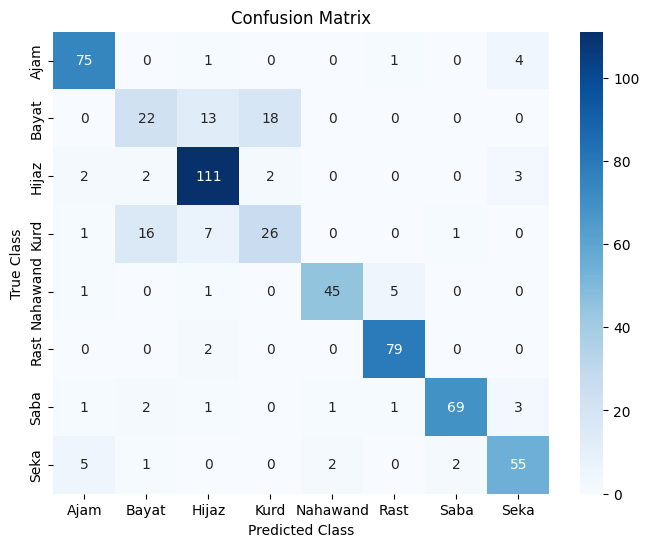

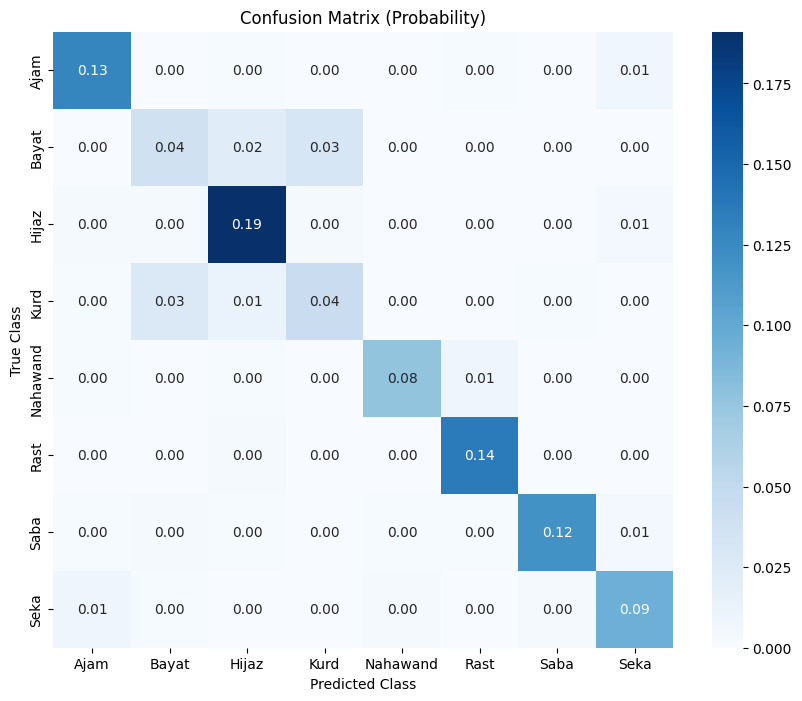

Option2


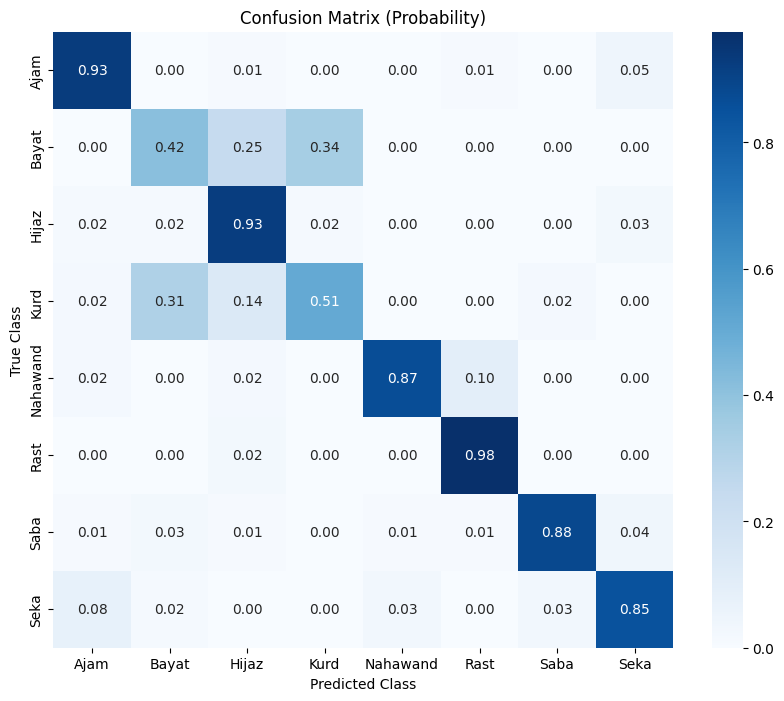

In [20]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

option = 1
combined_tensor = torch.stack(t)
combined_tensor1 = torch.stack(p)
true = combined_tensor.cpu()
predicted = combined_tensor1.cpu()
if option == 1:
    # Assuming you have predictions and true labels from your model
    # Replace predicted_labels and true_labels with your actual data

    # Calculate the confusion matrix
    cm = confusion_matrix(true, predicted)

    # Create a pandas DataFrame to display the confusion matrix with class names
    class_names = ['Ajam', 'Bayat', 'Hijaz',
                    'Kurd', 'Nahawand', 'Rast', 'Saba', 'Seka']
    cm_df = pd.DataFrame(cm, index=class_names, columns=class_names)

    # Display the confusion matrix using seaborn heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Class')
    plt.ylabel('True Class')
    plt.title('Confusion Matrix')

    # Save the confusion matrix plot as a PNG image
    plt.savefig('confusion_matrix.jpeg', format='jpeg')

    # Show the plot (optional)
    plt.show()

    # Save the confusion matrix to a CSV file
    cm_df.to_csv('confusion_matrix.csv')
option=2
if option == 2:

    # Calculate the confusion matrix
    cm = confusion_matrix(true, predicted)

    # Calculate the probability representation of the confusion matrix
    cm_probability = cm / cm.sum()

    # Create a pandas DataFrame to display the confusion matrix with class names
    class_names = ['Ajam', 'Bayat', 'Hijaz',
                    'Kurd', 'Nahawand', 'Rast', 'Saba', 'Seka']
    cm_df_probability = pd.DataFrame(
        cm_probability, index=class_names, columns=class_names)

    # Display the confusion matrix with probabilities using seaborn heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm_df_probability, annot=True, fmt='.2f', cmap='Blues')
    plt.xlabel('Predicted Class')
    plt.ylabel('True Class')
    plt.title('Confusion Matrix (Probability)')

    # Save the confusion matrix plot as a PNG image
    plt.savefig('confusion_matrix_probability.png', format='png')

    # Show the plot (optional)
    plt.show()
    print("Option2")
option = 3
if option==3:

    # Assuming you have the true labels 'true' and predicted labels 'predicted'

    # Calculate the confusion matrix
    cm = confusion_matrix(true, predicted)

    # Calculate the probability representation of the confusion matrix
    cm_probability = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    # Create a pandas DataFrame to display the confusion matrix with class names
    class_names = ['Ajam', 'Bayat', 'Hijaz', 'Kurd', 'Nahawand', 'Rast', 'Saba', 'Seka']
    cm_df_probability = pd.DataFrame(cm_probability, index=class_names, columns=class_names)

    # Display the confusion matrix with probabilities using seaborn heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm_df_probability, annot=True, fmt='.2f', cmap='Blues')
    plt.xlabel('Predicted Class')
    plt.ylabel('True Class')
    plt.title('Confusion Matrix (Probability)')
    # Save the confusion matrix plot as a PNG image
    plt.savefig('confusion_matrix_probability.png', format='png')

    # Show the plot (optional)
    plt.show()

In [16]:
import torch
import torch.nn.functional as F
from torch.utils.data import DataLoader
if option == 4:
    # Define your batch size and other parameters
    batch_size = 32
    # Add any other parameters you need for your models and test settings

    # Load the test dataset
    test_dataset = MaqamDataset(mode='test', cache_file='test.pkl')  # Replace with the correct parameters for your dataset
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, collate_fn=custom_collate)

    # Load your models and their weights (assuming you have already defined and loaded them as shown in the previous examples)
    model1 = MaqamCNN1().to(device)  # Replace YourModel with the actual model architecture of the first model
    model2 = MFCC_LSTM2().to(device)  # Replace YourModel with the actual model architecture of the second model
    model3 = ANNModel().to(device)  # Replace YourModel with the actual model architecture of the third model

    model1_path = "cnn78.pth"
    model2_path = "lstm8359.pth"
    model3_path = "ann1.pth"

    model1.load_state_dict(torch.load(model1_path))
    model2.load_state_dict(torch.load(model2_path))
    model3.load_state_dict(torch.load(model3_path))

    # Set the models to evaluation mode
    model1.eval()
    model2.eval()
    model3.eval()

    # Define the weights for combining the models
    weight1 = 0.33
    weight2 = 0.33
    weight3 = 0.34

    # Prepare lists to store the final predictions and corresponding labels
    all_predictions = []
    all_labels = []

    # Prepare lists to store the predictions and labels for each model independently
    model1_predictions = []
    model2_predictions = []
    model3_predictions = []

    # Loop through the test data
    with torch.no_grad():
        for inputs, labels in test_loader:
            # Assuming inputs and labels are tensors, otherwise, convert them to tensors
            inputs = inputs.to(device)  # Move data to the device (CPU or GPU)
            labels = labels.to(device)

            # Get the predictions from each model
            predictions1 = model1(inputs)
            predictions2 = model2(inputs)
            predictions3 = model3(inputs)

            # Save the predictions of each model for individual accuracy calculation
            model1_predictions.extend(predictions1.argmax(dim=1).cpu().numpy())
            model2_predictions.extend(predictions2.argmax(dim=1).cpu().numpy())
            model3_predictions.extend(predictions3.argmax(dim=1).cpu().numpy())

            # Combine the predictions using the specified weights
            combined_predictions = weight1 * predictions1 + weight2 * predictions2 + weight3 * predictions3

            # Apply softmax to get the probabilities
            probabilities = F.softmax(combined_predictions, dim=1)

            # Get the class with the highest probability as the predicted class
            _, predicted_labels = torch.max(probabilities, 1)

            # Append the predictions and labels to the lists
            all_predictions.extend(predicted_labels.cpu().numpy())  # Convert back to CPU and extract the numpy array
            all_labels.extend(labels.cpu().numpy())  # Convert back to CPU and extract the numpy array

    # Calculate the accuracy of each model independently
    correct_model1 = sum([1 for pred, true in zip(model1_predictions, all_labels) if pred == true])
    correct_model2 = sum([1 for pred, true in zip(model2_predictions, all_labels) if pred == true])
    correct_model3 = sum([1 for pred, true in zip(model3_predictions, all_labels) if pred == true])

    total_samples = len(all_labels)
    acc_model1 = correct_model1 / total_samples * 100
    acc_model2 = correct_model2 / total_samples * 100
    acc_model3 = correct_model3 / total_samples * 100

    print(f'Model 1 Accuracy: {acc_model1:.5f}%')
    print(f'Model 2 Accuracy: {acc_model2:.5f}%')
    print(f'Model 3 Accuracy: {acc_model3:.5f}%')

    # Calculate the combined accuracy
    correct_combined = sum([1 for pred, true in zip(all_predictions, all_labels) if pred == true])
    acc_combined = correct_combined / total_samples * 100
    print(f'Combined Accuracy: {acc_combined:.5f}%')